Importing libraries 

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

Reading and cleaning our data

In [105]:
df = pd.read_csv("medical_insurance.csv")
print(df)

       person_id  age     sex   region urban_rural    income     education  \
0          75722   52  Female    North    Suburban   22700.0     Doctorate   
1          80185   79  Female    North       Urban   12800.0         No HS   
2          19865   68    Male    North       Rural   40700.0            HS   
3          76700   15    Male    North    Suburban   15600.0  Some College   
4          92992   53    Male  Central    Suburban   89600.0     Doctorate   
...          ...  ...     ...      ...         ...       ...           ...   
99995       6266   50    Male     West       Urban  127200.0         No HS   
99996      54887   42    Male     East    Suburban   21600.0            HS   
99997      76821   41    Male     West       Rural   81900.0            HS   
99998        861   51  Female    South       Urban   43400.0     Doctorate   
99999      15796   44  Female    South       Rural   43700.0  Some College   

      marital_status employment_status  household_size  ...  li

In [106]:
#checking for missing values
df.isnull().sum()

person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

In [107]:
#replacing missing values for alcohol frequency
def fill_alcohol_freq_missing(df):
    df["alcohol_freq"] = df["alcohol_freq"].fillna("daily")
    return df

#filling the values out 
df = fill_alcohol_freq_missing(df)

In [108]:
#checking for missing values after filling out missing values
df.isnull().sum()

person_id                      0
age                            0
sex                            0
region                         0
urban_rural                    0
income                         0
education                      0
marital_status                 0
employment_status              0
household_size                 0
dependents                     0
bmi                            0
smoker                         0
alcohol_freq                   0
visits_last_year               0
hospitalizations_last_3yrs     0
days_hospitalized_last_3yrs    0
medication_count               0
systolic_bp                    0
diastolic_bp                   0
ldl                            0
hba1c                          0
plan_type                      0
network_tier                   0
deductible                     0
copay                          0
policy_term_years              0
policy_changes_last_2yrs       0
provider_quality               0
risk_score                     0
annual_med

In [109]:
#checking for duplicate rows
df.duplicated().sum()

np.int64(0)

In [110]:
#statistical summary of the dataset showing scales of variables - useful to explain the need for standardization
df.describe() 

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


In [111]:
#listing all columns
df.columns 

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

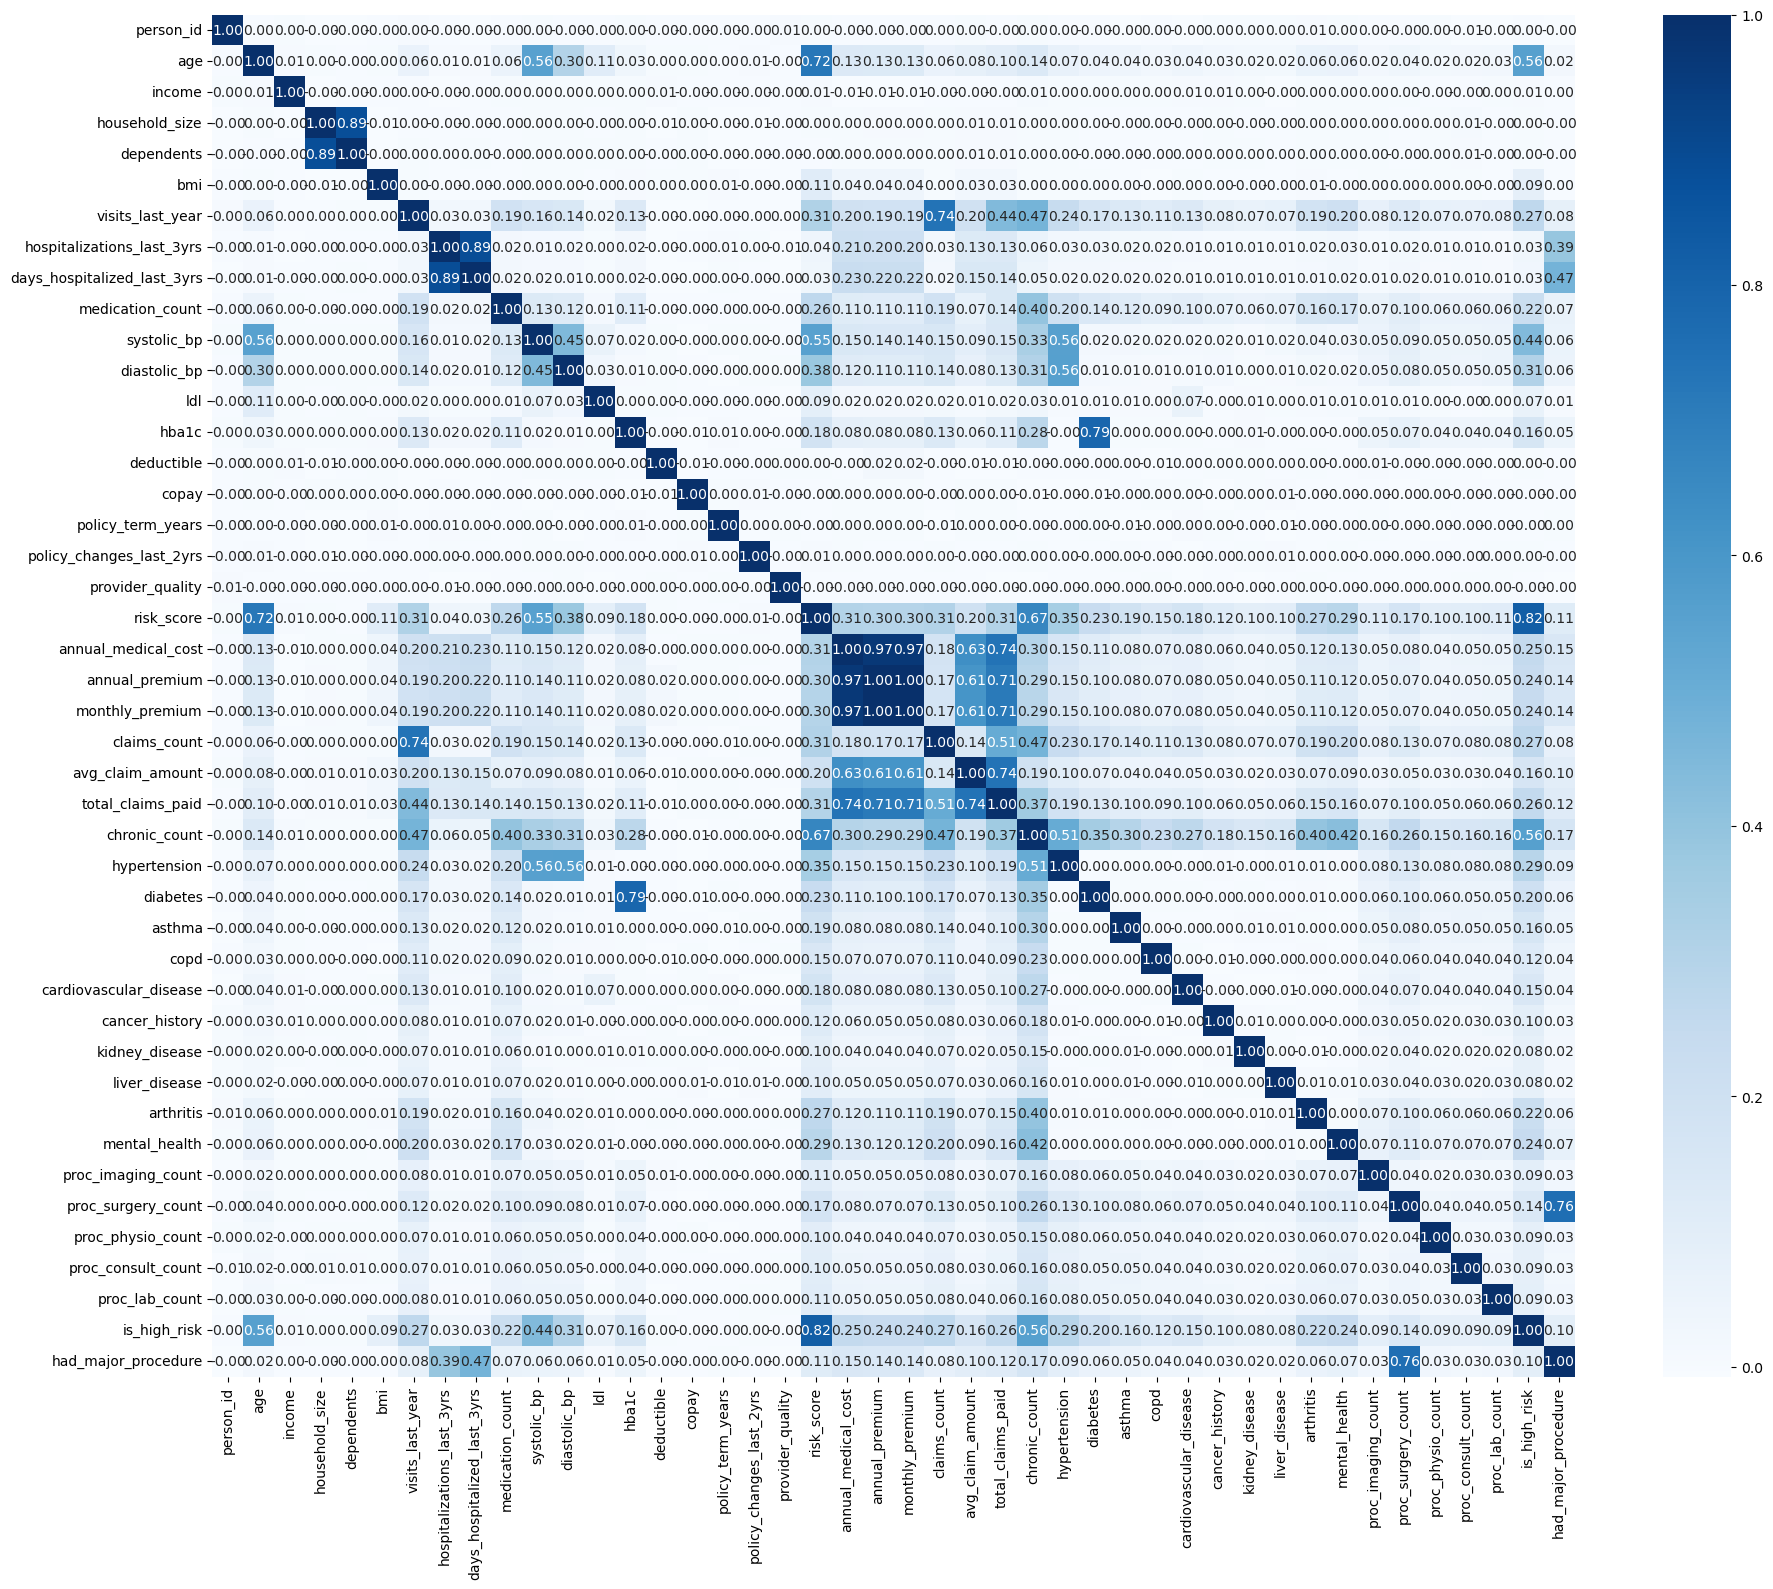

In [112]:
#checking if any of the numberical variables have high correlation
corr = df.select_dtypes(include="number").corr()

#creating bigger figure
plt.figure(figsize=(20, 16)) 
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [113]:
#checking data types 
df.dtypes

person_id                        int64
age                              int64
sex                             object
region                          object
urban_rural                     object
income                         float64
education                       object
marital_status                  object
employment_status               object
household_size                   int64
dependents                       int64
bmi                            float64
smoker                          object
alcohol_freq                    object
visits_last_year                 int64
hospitalizations_last_3yrs       int64
days_hospitalized_last_3yrs      int64
medication_count                 int64
systolic_bp                    float64
diastolic_bp                   float64
ldl                            float64
hba1c                          float64
plan_type                       object
network_tier                    object
deductible                       int64
copay                    

Define y (target) and X (dropping columns)

In [114]:
#split off target first
y = df["annual_premium"]
X = df.drop(columns=["person_id","annual_premium","annual_medical_cost", "monthly_premium","avg_claim_amount","household_size","is_high_risk"]) 

#printing new columns
print(X)
print(X.columns.tolist())

       age     sex   region urban_rural    income     education  \
0       52  Female    North    Suburban   22700.0     Doctorate   
1       79  Female    North       Urban   12800.0         No HS   
2       68    Male    North       Rural   40700.0            HS   
3       15    Male    North    Suburban   15600.0  Some College   
4       53    Male  Central    Suburban   89600.0     Doctorate   
...    ...     ...      ...         ...       ...           ...   
99995   50    Male     West       Urban  127200.0         No HS   
99996   42    Male     East    Suburban   21600.0            HS   
99997   41    Male     West       Rural   81900.0            HS   
99998   51  Female    South       Urban   43400.0     Doctorate   
99999   44  Female    South       Rural   43700.0  Some College   

      marital_status employment_status  dependents   bmi  ... kidney_disease  \
0            Married           Retired           1  27.4  ...              0   
1            Married          Emplo

In [115]:
#checking dropped columns
dropped_columns = df.columns.difference(X.columns)
for col in dropped_columns:
    print(col)

annual_medical_cost
annual_premium
avg_claim_amount
household_size
is_high_risk
monthly_premium
person_id


Automatically preprocesses the dataset by one-hot encoding categorical features and scaling numerical features using a ColumnTransformer

In [116]:
#detect columns from X (not df - only looking at data where target has been removed)
categorical_cols = X.select_dtypes(include=["object"]).columns 
numeric_cols = X.select_dtypes(exclude=["object"]).columns

#build preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols), #onehot encoding
        ("num", RobustScaler(), numeric_cols), #scales numerical features so income (e.g. 80,000) does not dominates bmi (e.g. 22)
    ],
    remainder="drop",
)


In [117]:
#printing attributes with their data types after one-hot encoding
def dtypes_after_onehot(preprocessor, X):
    Xt = preprocessor.fit_transform(X)
    feature_names = preprocessor.get_feature_names_out()
    
    df_out = pd.DataFrame({
        "feature": feature_names,
        "dtype": pd.DataFrame(Xt, columns=feature_names).dtypes.values
    })
    
    print(df_out.to_string(index=False))

dtypes_after_onehot(preprocessor, X)


                             feature   dtype
                       cat__sex_Male float64
                      cat__sex_Other float64
                    cat__region_East float64
                   cat__region_North float64
                   cat__region_South float64
                    cat__region_West float64
           cat__urban_rural_Suburban float64
              cat__urban_rural_Urban float64
            cat__education_Doctorate float64
                   cat__education_HS float64
              cat__education_Masters float64
                cat__education_No HS float64
         cat__education_Some College float64
         cat__marital_status_Married float64
          cat__marital_status_Single float64
         cat__marital_status_Widowed float64
      cat__employment_status_Retired float64
cat__employment_status_Self-employed float64
   cat__employment_status_Unemployed float64
                  cat__smoker_Former float64
                   cat__smoker_Never float64
        ca

Checking for low variance or constant features

In [118]:
from sklearn.feature_selection import VarianceThreshold

#constants
constant_features = [col for col in df.columns if df[col].nunique() == 1]

#low variance
numeric_df = df.select_dtypes(include=["number"])
selector = VarianceThreshold(threshold=0.01)
selector.fit(numeric_df)
low_variance_features = numeric_df.columns[~selector.get_support()].tolist()

print("Constant features:", constant_features)
print("Low-variance features:", low_variance_features)


Constant features: []
Low-variance features: []


Train/test split

In [119]:
#hold out test (20%)
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

#from remaining 80%, carve out validation (10% of total)
#0.10/0.80 = 0.125 of trainval
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.125, random_state=42
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Train: (70000, 47) Val: (10000, 47) Test: (20000, 47)


Error (residual) analysis

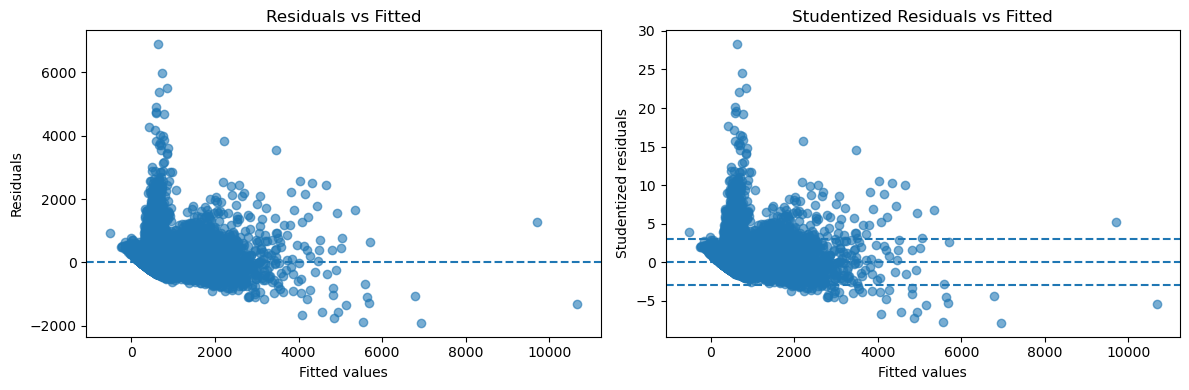

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# --- simple diagnostic model ---
diag_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

diag_model.fit(X_train, y_train)

# predictions and residuals
y_hat = diag_model.predict(X_train)
y_arr = y_train.to_numpy()
residuals = y_arr - y_hat

# ---- studentized residuals (simple & stable) ----
Z = diag_model.named_steps["preprocessor"].transform(X_train)
Z = Z.toarray() if hasattr(Z, "toarray") else Z
X_design = np.c_[np.ones(Z.shape[0]), Z]

n, p = X_design.shape
mse = np.sum(residuals**2) / (n - p)

XtX_inv = np.linalg.pinv(X_design.T @ X_design)
h = np.sum((X_design @ XtX_inv) * X_design, axis=1)
h = np.clip(h, 0, 1 - 1e-8)

rstudent = residuals / (np.sqrt(mse) * np.sqrt(1 - h))

# ---- plots (like your figure) ----
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Residuals vs fitted
axes[0].scatter(y_hat, residuals, alpha=0.6)
axes[0].axhline(0, linestyle="--")
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs Fitted")

# Studentized residuals vs fitted
axes[1].scatter(y_hat, rstudent, alpha=0.6)
axes[1].axhline(0, linestyle="--")
axes[1].axhline(3, linestyle="--")
axes[1].axhline(-3, linestyle="--")
axes[1].set_xlabel("Fitted values")
axes[1].set_ylabel("Studentized residuals")
axes[1].set_title("Studentized Residuals vs Fitted")

plt.tight_layout()
plt.show()


Box plots for checking outliers

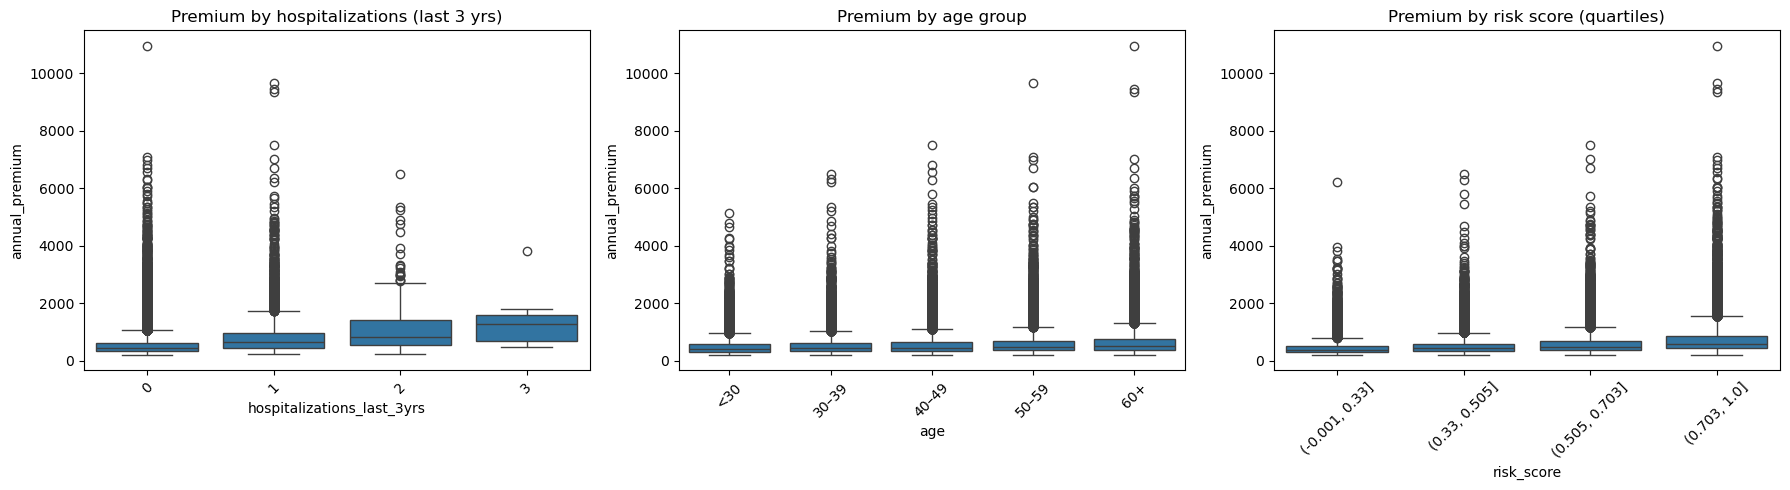

In [121]:
import matplotlib.pyplot as plt

income_candidates = [c for c in df.columns if "annual_premium" in c.lower()]
if not income_candidates:
    raise ValueError("No column containing 'annual_premium' found. Check df.columns.")
income_col = income_candidates[0]   #picking the first match
df_bp = df.copy()

#hospitalizations 
df_bp["hospitalizations_last_3yrs_grp"] = df_bp["hospitalizations_last_3yrs"].astype("Int64")
hosp_order = sorted(df_bp["hospitalizations_last_3yrs_grp"].dropna().unique())

#ages
df_bp["age_grp"] = pd.cut(
    df_bp["age"],
    bins=[0, 30, 40, 50, 60, 120],
    labels=["<30", "30–39", "40–49", "50–59", "60+"],
    include_lowest=True
)

#risk score quartiles
df_bp["risk_score_grp"] = pd.qcut(df_bp["risk_score"], q=4, duplicates="drop")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df_bp, x="hospitalizations_last_3yrs_grp", y=income_col, order=hosp_order, ax=axes[0])
axes[0].set_title("Premium by hospitalizations (last 3 yrs)")
axes[0].set_xlabel("hospitalizations_last_3yrs")

sns.boxplot(data=df_bp, x="age_grp", y=income_col, ax=axes[1])
axes[1].set_title("Premium by age group")
axes[1].set_xlabel("age")

sns.boxplot(data=df_bp, x="risk_score_grp", y=income_col, ax=axes[2])
axes[2].set_title("Premium by risk score (quartiles)")
axes[2].set_xlabel("risk_score")

for ax in axes:
    ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


In [122]:
def evaluate_regressor(name, model, X_train, y_train, X_val, y_val, X_test, y_test):
    #predictions
    y_pred_train = model.predict(X_train)
    y_pred_val   = model.predict(X_val)
    y_pred_test  = model.predict(X_test)

    #train metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train  = mean_absolute_error(y_train, y_pred_train)
    r2_train   = r2_score(y_train, y_pred_train)

    #validation metrics
    rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
    mae_val  = mean_absolute_error(y_val, y_pred_val)
    r2_val   = r2_score(y_val, y_pred_val)

    #test metrics
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test  = mean_absolute_error(y_test, y_pred_test)
    r2_test   = r2_score(y_test, y_pred_test)

    print(f"{name}")
    print(f"Train: RMSE={rmse_train:.2f}, MAE={mae_train:.2f}, R²={r2_train:.3f}")
    print(f"Val:   RMSE={rmse_val:.2f}, MAE={mae_val:.2f}, R²={r2_val:.3f}")
    print(f"Test:  RMSE={rmse_test:.2f}, MAE={mae_test:.2f}, R²={r2_test:.3f}")
    print()


In [123]:
from sklearn.dummy import DummyRegressor
baseline = Pipeline(steps=[
    ("preprocessor", preprocessor),      
    ("regressor", DummyRegressor(strategy="mean")) #baseline predicting mean value
])

baseline.fit(X_train, y_train)

evaluate_regressor("Baseline (mean)", baseline, X_train, y_train, X_val, y_val, X_test, y_test)


Baseline (mean)
Train: RMSE=402.59, MAE=251.36, R²=0.000
Val:   RMSE=379.25, MAE=246.28, R²=-0.000
Test:  RMSE=398.93, MAE=251.30, R²=-0.000



Linear regression

In [124]:
#pipeline (running preprocessor + model)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

#train the model (only train set goes into fit)
model.fit(X_train, y_train)

evaluate_regressor("Linear Regression", model, X_train, y_train, X_val, y_val,  X_test, y_test) #evaluate linear regression model



Linear Regression
Train: RMSE=243.68, MAE=143.93, R²=0.634
Val:   RMSE=229.18, MAE=141.53, R²=0.635
Test:  RMSE=257.41, MAE=146.71, R²=0.584



DecisonTreeRegressor

In [125]:
tree = DecisionTreeRegressor(
    max_depth=6,         #limit how deep it can grow
    min_samples_split=20, 
    min_samples_leaf=15,
    random_state=42
)
tree_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", tree)
])

tree_pipeline.fit(X_train, y_train)

evaluate_regressor("Decision Tree", tree_pipeline, X_train, y_train, X_val, y_val, X_test, y_test)

Decision Tree
Train: RMSE=232.02, MAE=132.76, R²=0.668
Val:   RMSE=220.58, MAE=129.89, R²=0.662
Test:  RMSE=248.14, MAE=135.88, R²=0.613



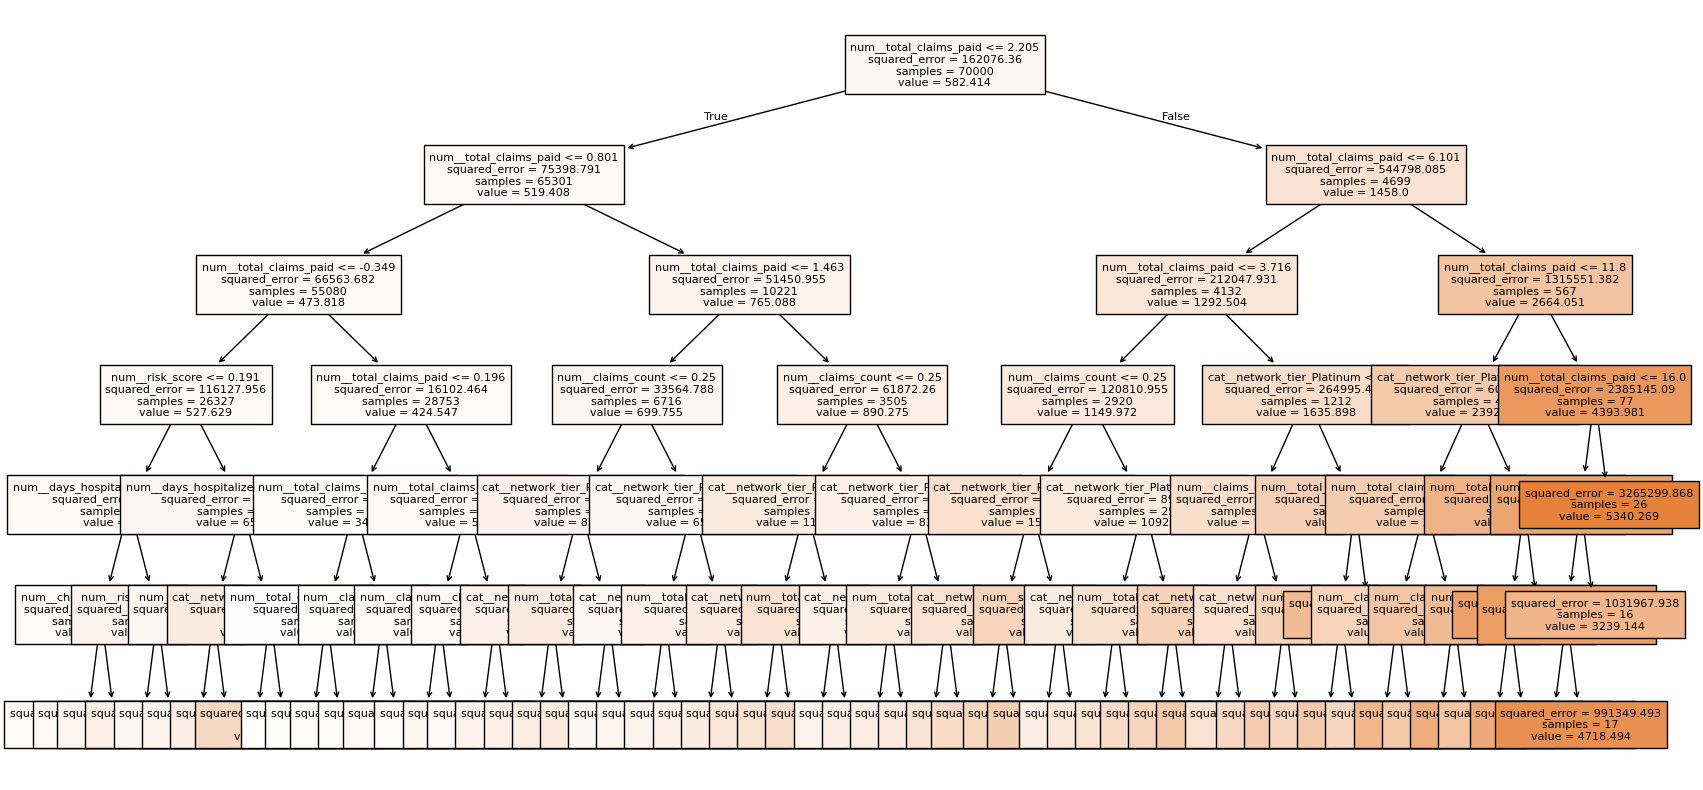

In [126]:
from sklearn import tree

feature_names = tree_pipeline.named_steps["preprocessor"].get_feature_names_out() #get feature names after preprocessing


plt.figure(figsize=(20, 10)) #create a bigger figure for better readability

tree.plot_tree(
    tree_pipeline.named_steps["regressor"], #access the decision tree model from the pipeline
    feature_names=feature_names, #use the feature names from preprocessor
    filled=True,
    fontsize=8
)

plt.show()

Ridge and Lasso using 5-fold cross-validation

In [127]:
from sklearn.linear_model import RidgeCV, LassoCV

ridge = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5))
])

lasso = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LassoCV(alphas=[0.001, 0.01, 0.1, 1.0], cv=5, max_iter=5000))
])

#fitting on train
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

#evaluate on train/val/test
evaluate_regressor("Ridge Regression", ridge, X_train, y_train, X_val, y_val,  X_test, y_test)

evaluate_regressor("Lasso Regression", lasso, X_train, y_train, X_val, y_val, X_test, y_test)

print("Ridge best alpha:", ridge.named_steps["regressor"].alpha_)
print("Lasso best alpha:", lasso.named_steps["regressor"].alpha_)



KeyboardInterrupt: 

Bagging

In [ ]:
rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1
    ))
])

rf.fit(X_train, y_train)

evaluate_regressor("Random Forest", rf, X_train, y_train, X_val, y_val,  X_test, y_test)



Random Forest
Train: RMSE=150.91, MAE=75.85, R²=0.859
Val:   RMSE=206.19, MAE=118.14, R²=0.704
Test:  RMSE=233.66, MAE=123.20, R²=0.657



Finding the most important features in RandomForest

In [ ]:
rf_reg = rf.named_steps["regressor"]
importances = rf_reg.feature_importances_

feature_names = rf.named_steps["preprocessor"].get_feature_names_out()

import pandas as pd

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

print(importance_df.head(20))


                             feature  importance
49            num__total_claims_paid    0.679149
48                 num__claims_count    0.041179
28        cat__network_tier_Platinum    0.031667
47                   num__risk_score    0.029618
36  num__days_hospitalized_last_3yrs    0.018649
27            cat__network_tier_Gold    0.017903
40                          num__ldl    0.014907
31                       num__income    0.014340
33                          num__bmi    0.013537
41                        num__hba1c    0.013460
46             num__provider_quality    0.013049
30                          num__age    0.011261
38                  num__systolic_bp    0.011068
39                 num__diastolic_bp    0.010519
29          cat__network_tier_Silver    0.008052
44            num__policy_term_years    0.006526
34             num__visits_last_year    0.005588
50                num__chronic_count    0.004748
42                   num__deductible    0.003458
37             num__

Boosting

In [ ]:

gbr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

gbr.fit(X_train, y_train)

evaluate_regressor( "Gradient Boosting", gbr, X_train, y_train,  X_val, y_val, X_test, y_test)


Gradient Boosting
Train: RMSE=214.71, MAE=120.79, R²=0.716
Val:   RMSE=204.97, MAE=119.58, R²=0.708
Test:  RMSE=233.43, MAE=124.23, R²=0.658



XGBoosting

In [ ]:
from xgboost import XGBRegressor

xgbr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        n_estimators=300,        #number of trees
        learning_rate=0.05,      #step size shrinkage
        max_depth=4,             #tree depth
        subsample=0.8,           #row sampling
        colsample_bytree=0.8,    #column sampling per tree
        random_state=42,
        objective="reg:squarederror"
    ))
])

xgbr.fit(X_train, y_train)

evaluate_regressor("XGBoost", xgbr, X_train, y_train, X_val, y_val, X_test, y_test)


XGBoost
Train: RMSE=208.18, MAE=117.25, R²=0.733
Val:   RMSE=207.43, MAE=118.52, R²=0.701
Test:  RMSE=234.02, MAE=122.55, R²=0.656



GridSearch KNN - systematic hyperparameter tuning with cross-validation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

#hyperparameter tuning for KNN
param_grid_knn = {
    "regressor__n_neighbors": [3, 5, 7, 10, 12, 15, 20, 30, 40, 100, 200], #try different k values
    "regressor__weights": ["uniform", "distance"] #try both uniform and distance weighting, where closer neighbors have more influence
}

#create KNN regression pipeline
knn_base = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", KNeighborsRegressor())
])

#grid search with 5-fold cross-validation
grid_knn = GridSearchCV(
    knn_base,
    param_grid_knn,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

#fit grid search
grid_knn.fit(X_train, y_train)
print("Best params KNN:", grid_knn.best_params_)

evaluate_regressor("KNN (tuned)", grid_knn.best_estimator_,  X_train, y_train,  X_val, y_val, X_test, y_test)


Best params KNN: {'regressor__n_neighbors': 15, 'regressor__weights': 'distance'}
KNN (tuned)
Train: RMSE=0.00, MAE=0.00, R²=1.000
Val:   RMSE=289.64, MAE=182.49, R²=0.417
Test:  RMSE=313.58, MAE=189.14, R²=0.382



Creating a table for all of our results

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#list to store results from all models
results = []

def evaluate_regressor(name, model, X_train, X_val, X_test, y_train, y_val, y_test):
    #printing metrics and storing them in the global `results` list

    #predictions
    y_pred_train = model.predict(X_train)
    y_pred_val   = model.predict(X_val)
    y_pred_test  = model.predict(X_test)

    #errors
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_val   = mean_squared_error(y_val, y_pred_val)
    mse_test  = mean_squared_error(y_test, y_pred_test)

    rmse_train = np.sqrt(mse_train)
    rmse_val   = np.sqrt(mse_val)
    rmse_test  = np.sqrt(mse_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_val   = mean_absolute_error(y_val, y_pred_val)
    mae_test  = mean_absolute_error(y_test, y_pred_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_val   = r2_score(y_val, y_pred_val)
    r2_test  = r2_score(y_test, y_pred_test)

    #print nicely
    print(f"{name}")
    print(f"Train: RMSE={rmse_train:.2f}, MAE={mae_train:.2f}, R²={r2_train:.3f}")
    print(f"Val:   RMSE={rmse_val:.2f}, MAE={mae_val:.2f}, R²={r2_val:.3f}")
    print(f"Test:  RMSE={rmse_test:.2f}, MAE={mae_test:.2f}, R²={r2_test:.3f}")
    print()

    #store in results list for later DataFrame
    results.append({
        "model": name,
        "rmse_train": rmse_train,
        "rmse_val": rmse_val,
        "rmse_test": rmse_test,
        "mae_train": mae_train,
        "mae_val": mae_val,
        "mae_test": mae_test,
        "r2_train": r2_train,
        "r2_val": r2_val,
        "r2_test": r2_test
    })

evaluate_regressor("Linear Regression", model, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Baseline (mean)", baseline, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Decision Tree", tree_pipeline, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Ridge Regression", ridge, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Lasso Regression", lasso, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Random Forest", rf, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Gradient Boosting", gbr, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("XGBoost", xgbr, X_train, X_val, X_test, y_train, y_val, y_test)
evaluate_regressor("Grid KNN", grid_knn.best_estimator_, X_train, X_val, X_test, y_train, y_val, y_test)

results_df = pd.DataFrame(results)

#round for nicer display
results_df_rounded = results_df.copy()
results_df_rounded[["rmse_train","rmse_val","rmse_test","mae_train","mae_val","mae_test","r2_train","r2_val","r2_test"]] = \
    results_df_rounded[["rmse_train","rmse_val","rmse_test","mae_train","mae_val","mae_test","r2_train","r2_val","r2_test"]].round(3)

#sort by best (lowest) val RMSE and display as a table
display(results_df_rounded.sort_values("rmse_val"))



Linear Regression
Train: RMSE=243.68, MAE=143.93, R²=0.634
Val:   RMSE=229.18, MAE=141.53, R²=0.635
Test:  RMSE=257.41, MAE=146.71, R²=0.584

Baseline (mean)
Train: RMSE=402.59, MAE=251.36, R²=0.000
Val:   RMSE=379.25, MAE=246.28, R²=-0.000
Test:  RMSE=398.93, MAE=251.30, R²=-0.000

Decision Tree
Train: RMSE=232.02, MAE=132.76, R²=0.668
Val:   RMSE=220.58, MAE=129.89, R²=0.662
Test:  RMSE=248.14, MAE=135.88, R²=0.613

Ridge Regression
Train: RMSE=243.68, MAE=143.92, R²=0.634
Val:   RMSE=229.17, MAE=141.52, R²=0.635
Test:  RMSE=257.41, MAE=146.70, R²=0.584

Lasso Regression
Train: RMSE=243.69, MAE=143.86, R²=0.634
Val:   RMSE=229.14, MAE=141.40, R²=0.635
Test:  RMSE=257.42, MAE=146.64, R²=0.584

Random Forest
Train: RMSE=150.91, MAE=75.85, R²=0.859
Val:   RMSE=206.19, MAE=118.14, R²=0.704
Test:  RMSE=233.66, MAE=123.20, R²=0.657

Gradient Boosting
Train: RMSE=214.71, MAE=120.79, R²=0.716
Val:   RMSE=204.97, MAE=119.58, R²=0.708
Test:  RMSE=233.43, MAE=124.23, R²=0.658

XGBoost
Train: RM

,model,rmse_train,rmse_val,rmse_test,mae_train,mae_val,mae_test,r2_train,r2_val,r2_test
6,Gradient Boosting,214.714,204.965,233.433,120.792,119.577,124.234,0.716,0.708,0.658
5,Random Forest,150.910,206.195,233.656,75.846,118.136,123.204,0.859,0.704,0.657
7,XGBoost,208.179,207.427,234.015,117.249,118.515,122.549,0.733,0.701,0.656
2,Decision Tree,232.021,220.579,248.138,132.763,129.892,135.877,0.668,0.662,0.613
4,Lasso Regression,243.689,229.137,257.419,143.862,141.396,146.637,0.634,0.635,0.584
3,Ridge Regression,243.677,229.174,257.410,143.920,141.516,146.704,0.634,0.635,0.584
0,Linear Regression,243.677,229.178,257.408,143.930,141.531,146.714,0.634,0.635,0.584
8,Grid KNN,0.000,289.640,313.577,0.000,182.485,189.137,1.000,0.417,0.382
1,Baseline (mean),402.587,379.248,398.931,251.358,246.280,251.295,0.000,-0.000,-0.000


                                                                                                                                                                                    ALL CODE BELOW BELONGS TO CLUSTERING

Prepping for clustering with KMeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#scale numeric data so the features hold the same weight
X_num = df[numeric_cols]
X_scaled = RobustScaler().fit_transform(X_num) 

inertias = []
silhouettes = []
k_values = range(2, 8)

#asking KMeans to make k clusters
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)

    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

print("Inertias:", inertias)
print("Silhouettes:", silhouettes)


Exception ignored in: <function ResourceTracker.__del__ at 0x10593dbc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


KeyboardInterrupt: 

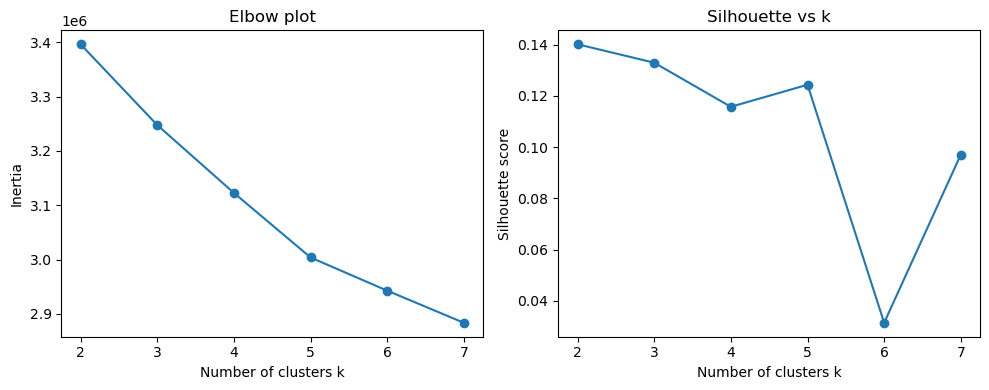

In [ ]:
k_values = range(2, 8)

plt.figure(figsize=(10,4))

#elbow (inertia)
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia")
plt.title("Elbow plot")

#silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, marker="o")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette score")
plt.title("Silhouette vs k")

plt.tight_layout()
plt.show()


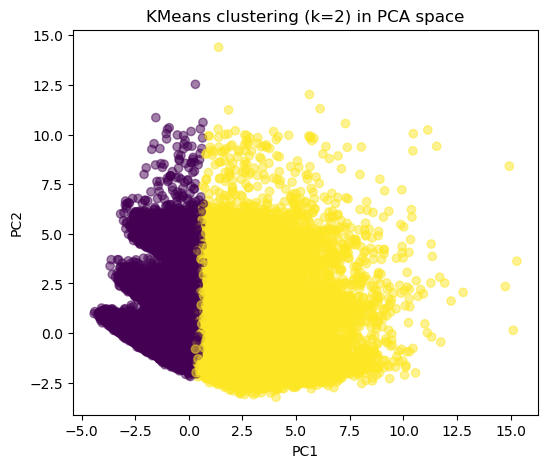

               age        income  dependents        bmi  visits_last_year  \
cluster                                                                     
0        43.741223  49615.219669    0.897641  26.897921          1.320519   
1        53.959293  50314.444805    0.899638  27.148194          2.961590   

         hospitalizations_last_3yrs  days_hospitalized_last_3yrs  \
cluster                                                            
0                          0.068662                     0.258253   
1                          0.136177                     0.569359   

         medication_count  systolic_bp  diastolic_bp  ...  kidney_disease  \
cluster                                               ...                   
0                0.916148   112.189829     70.713526  ...        0.007254   
1                1.781571   127.378338     78.528544  ...        0.027165   

         liver_disease  arthritis  mental_health  proc_imaging_count  \
cluster                              

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#choosing k= 2 because that is our best silhouette
best_k = 2

km = KMeans(n_clusters=best_k, random_state=42, n_init=1, max_iter=100)
labels = km.fit_predict(X_scaled)

#project to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) 

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"KMeans clustering (k={best_k}) in PCA space")
plt.show()

#taking the mean of every value in each cluster
df_clusters = df.copy()
df_clusters["cluster"] = labels

print(df_clusters.groupby("cluster")[numeric_cols].mean())

Måske ikke pensum: Fairness check by gender (or similar column) AND Fairness / group comparison by age groups

In [ ]:
#choose main model for evaluation / fairness checks
#(change to model if we prefer another)
best_model = gbr

#predictions for all rows in the original X
y_pred_all = best_model.predict(X)

df_eval = df.copy()
df_eval["y_true"] = y
df_eval["y_pred"] = y_pred_all

#inspect categorical columns so you know what you can group by
cat_cols = df.select_dtypes(include="object").columns.tolist()
print("Categorical columns in the data:", cat_cols)

#choose a categorical column to check fairness / group differences
#change if our dataset uses another name (e.g. "gender", "smoker", "region")
group_col = "sex"   #try "sex" first; if that doesn't exist, change to one of cat_cols above

if group_col in df_eval.columns:
    print(f"\nAverage true & predicted annual_premium by {group_col}:")
    print(
        df_eval.groupby(group_col)[["y_true", "y_pred"]].mean()
    )
else:
    print(f"\nColumn {group_col!r} not found. "
          f"Set group_col to one of these: {cat_cols}")

#age-group comparison (only if an 'age' column exists)
age_col = "age"     #change if your age column has another name

if age_col in df_eval.columns:
    df_eval["age_bin"] = pd.cut(
        df_eval[age_col],
        bins=[0, 30, 50, 100],
        labels=["<30", "30–50", ">50"]
    )

    print("\nAverage true & predicted annual_premium by age group:")
    print(
        df_eval.groupby("age_bin")[["y_true", "y_pred"]].mean()
    )
else:
    print(f"\nColumn {age_col!r} not found – skipping age-group analysis.")

Categorical columns in the data: ['sex', 'region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'smoker', 'alcohol_freq', 'plan_type', 'network_tier']

Average true & predicted annual_premium by sex:
            y_true      y_pred
sex                           
Female  581.021291  580.628148
Male    583.772792  583.296116
Other   578.844511  580.916109

Average true & predicted annual_premium by age group:
             y_true      y_pred
age_bin                        
<30      510.824094  514.482995
30–50    558.129207  555.385403
>50      631.151317  631.763467


/var/folders/3f/2x1hpgqj53jc2g91mv6vjwsr0000gn/T/ipykernel_30093/1468698898.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eval.groupby("age_bin")[["y_true", "y_pred"]].mean()
